# Applications of the Singular Value Decomposition
### Sebastian Lech
In this notebook we explore an extremely useful result in linear algebra, the Singular Value Decomposition (SVD).  In particular, we gain insight into the SVD's versatility by developing applications in image compression and Principal Component Analysis (PCA).  The SVD is a factorization technique that exposes correlated structure within a matrix.  By exposing correlation we can focus our attention on the elements of the matrix that matter most, and leverage this to compress or reduce its complexity.  Since almost all data can be arranged in a matrix, this factorization becomes an extremely effective way to reduce the complexity of many kinds of data.  These results have been around for a long time and have a strong theoretical foundation with plenty of great resources available throughout the literature.  This notebook will only touch on some basic theory so if more context is required please see the resources linked below.    

## Sections
1. Theory
2. Image Compression
3. Principal Component Analysis (PCA)
4. Conclusion
5. Appendix

## References
1. Data-Driven Science and Engineering: Machine Learning, Dynamical Systems, and Control by Steven L. Brunton, J. Nathan Kutz (http://www.databookuw.com/) and accompanying playlist (https://www.youtube.com/playlist?list=PLMrJAkhIeNNRpsRhXTMt8uJdIGz9-X_1-)
2. Fundamental Theorem of Linear Algebra by Gilbert Strang (https://www.uvm.edu/pdodds/teaching/courses/2009-01UVM-124/docs/strang1993a.pdf)
3. Notes on the SVD (https://graphics.stanford.edu/courses/cs205a-13-fall/assets/notes/chapter6.pdf)
4. A Tutorial on Principal Component Analysis by Jonathon Shlens (https://arxiv.org/pdf/1404.1100.pdf)
5. Options, Futures, and other Derivatives (8th Ed.) by John C. Hull (https://www.amazon.ca/Options-Futures-Other-Derivatives-10th/dp/013447208X)




# 1. Theory
Much of what is described below is gathered from [1], especially the video lectures.  For more comprehensive treatment, see section 1 in [1] and the accompanying lecture videos.  Strang's discussion in [2] about the four fundamental subspaces and their relation to the SVD is a very manageable review of the topic and provides great context.  On the other hand [3] is much more mathematical and provides proofs of some useful facts.  [4] is a comprehensive review of Principal Component Analysis with a great section (VI) relating it to the SVD.  Lastly, Chapter 21 in [5] walks through PCA in the context of finance and Value at Risk (VaR).   


We assume that the SVD of a matrix exists and is of the form

$$A = U\Sigma V^T$$

where $A$ is any $m\times n$ matrix (for a full derivation, see [3]).  A beautiful feature of the factorization above is that it recovers the geometric action $A$ has on a vector.  By construction, $U$ and $V$ are orthogonal matrices, which preserve length when acting on a vector, so can be thought of as rotations.  $\Sigma$ is a diagonal matrix which serves to stretch or compress vectors.  Put these matrices together and we get an interpretable depiction of any matrix transformation.  For example, consider the SVD for the matrix $A$.  The code below derives the SVD using common methods (diagonalizing positive semi-definite matrices $A^TA$ and $AA^T$) and depicts the components visually

$$A = \begin{bmatrix}2& 2 \\ -1 & 3\end{bmatrix}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy.linalg as LA
from matplotlib.patches import Ellipse
import math

%matplotlib inline 
plt.style.use('fivethirtyeight')

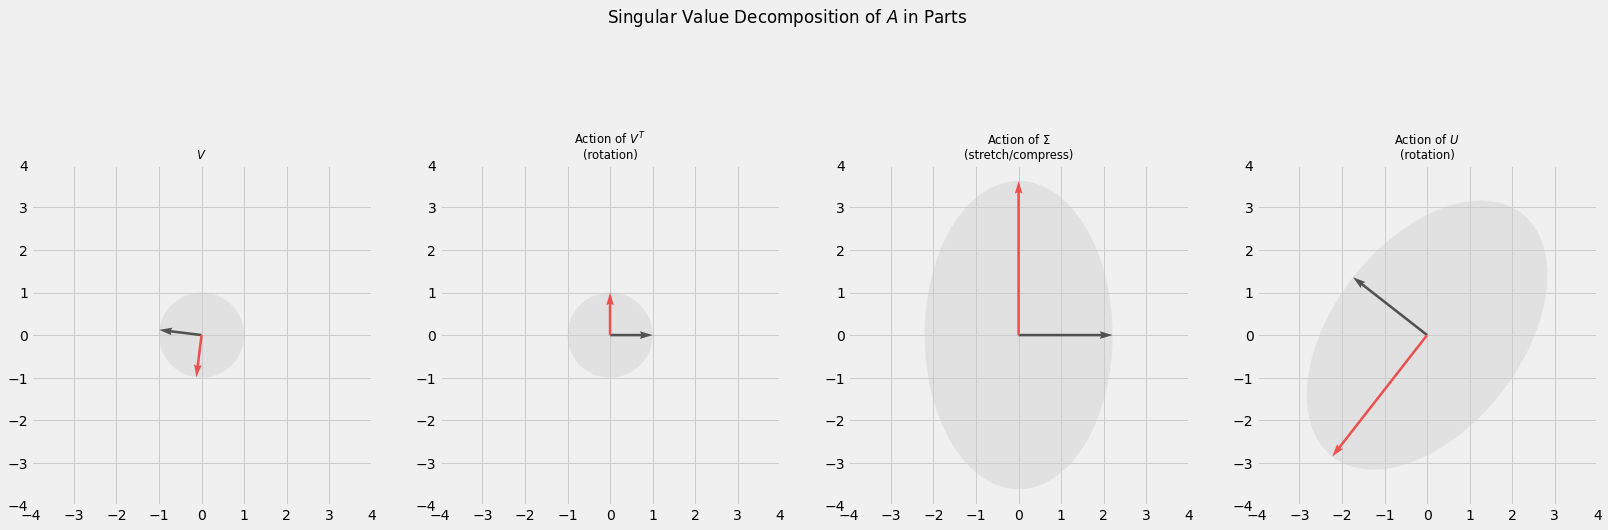

In [2]:
A = np.array([[2, 2], 
              [-1, 3]])
sig, V = LA.eig(A.T @ A)  # EVD of covariance matrix ATA
Sig = np.diag(np.sqrt(sig))
U = A @ V
for i in range(U.shape[1]):
    norm = LA.norm(U[:, i])
    U[:, i] = (1/norm)*U[:, i]  # normalize vectors in U
SVD = [V, V@V.T, Sig @ V @ V.T, U @ Sig @ V @ V.T]

o = np.array([[0, 0],[0, 0]])  # define origin

fig, axs = plt.subplots(1, 4, figsize=(25, 8))
i=0
for part in SVD:
    
    # keep track of how to rotate ellipse
    x_basis = np.array([0, 1])
    new_x = part[:, 1] / LA.norm(part[:, 1])
    rotate_val = np.arccos(np.dot(x_basis, new_x))
    
    # plot vectors and ellipse
    axs[i].quiver(*o, part[0, :], part[1, :], units='xy', scale=1, color=['#000000', '#FF0000'])
    
    e = Ellipse(xy=(0,0), width=LA.norm(part[:, 0])*2, height=LA.norm(part[:, 1])*2, angle=math.degrees(rotate_val))
    e.set_alpha(0.4)
    e.set_facecolor('#CCCCCC')
    
    axs[i].add_artist(e)
    axs[i].set_aspect('equal')
    axs[i].set_xlim(-4,4)
    axs[i].set_ylim(-4,4)
    plt.grid(True)
    i+=1

# titles
axs[0].set_title('$V$', fontsize='small')
axs[1].set_title('Action of $V^T$\n(rotation)', fontsize='small')
axs[2].set_title('Action of $\Sigma$\n(stretch/compress)', fontsize='small')
axs[3].set_title('Action of $U$\n(rotation)', fontsize='small')
fig.suptitle(r'Singular Value Decomposition of $A$ in Parts')
plt.subplots_adjust(top=0.75)

In addition to the geometric intuition the SVD gives us, the form of its factorization is very useful.  Recall that the dot product between two vectors can give us a sense of how similar they are; their covariance. For instance, if  $\vec{u}^T\vec{v}>0$ then both vectors lie in the same direction (positive covariance), if $\vec{u}^T \vec{v}=0$ then both vectors are orthogonal (zero covariance), and if $\vec{u}^T \vec{v}<0$ then both vectors lie in opposite directions (negative covariance).  Now imagine we conduct an experiment in which we gather $m$ samples pertaining to $n$ types of measurements, or features. Then we can broadcast the vector idea of covariance to matrices and study $A^TA$, which encodes covariance among measurements, and $AA^T$, which encodes covariance among samples.  Now using the SVD for $A$, the first covariance matrix becomes

$$
\begin{align}
A^TA &= (U\Sigma V^T)^T(U\Sigma V^T)\\
     &= V\Sigma U^TU\Sigma V^T \\
     &= V\Sigma^2 V^T\\
(A^TA)V &= V\Sigma^2
\end{align}
$$

meaning the matrix $V$ in the Singular Value Decomposition of $A$ consists of the eigenvectors of $A^TA$.  In a similar fashion we find the the matrix $U$ from the SVD consists of the eigenvectors of the covariance matrix $AA^T$.  Moreover, the eigenvectors in both $U$ and $V$ are arranged in such a way that the first eigenvector captures the most amount of variation in the dataset, the second eigenvector captures the second most amount of variance in the dataset, and so on.  This is an extremely useful fact.  For example, we can choose to interpret $A=U\Sigma V^T$ as the sum of outer products between eigenvectors ordered in terms of their importance.  

$$A = \sigma_1\vec{u}_1\vec{v}_1^T + \sigma_2\vec{v}_2\vec{v}_2^T + \sigma_3\vec{u}_3\vec{v}_3^T + \cdots + \sigma_m\vec{u}_m\vec{v}_m^T$$

Furthermore, we can truncate this sum at an earlier stage to capture as much of the variation in the dataset with as little overhead as possible.  This strategy is apparent in the image compression section below.

Not only can we use these eigenvectors to compress certain data, we can use them to reduce the complexity of other kinds; this is Principal Component Analysis.  With the eigenvectors in $V$ that capture the most variation readily available (these are called principal axes), we can project our data into a new space that has a relatable interpretation.  Recall that we used samples from an experiment to generate an $m\times n$ matrix $A$ where each row is a sample in $n$ dimensional space.  If $n$ is anything large it becomes extremely difficult to visualize the space in which these samples reside.  However, if we can capture enough of the variation within the experiment using only 2 or 3 eigenvectors from $V$ and project the samples of $A$ onto those vectors, we will have effectively reduced the complexity of the problem.  Projecting our data onto an eigenvector in $V$ gives us a principal component, and is exactly what we use to study the structure of interest rates for Canadian Treasury notes in the PCA section.  

# 2. Image Compression
This is a direct application of the factorization the SVD comes in.  As mentioned earlier, we can view the SVD as a sum of outer products

$$A = U\Sigma V^T =  \sigma_1\vec{u}_1\vec{v}_1^T + \sigma_2\vec{v}_2\vec{v}_2^T + \sigma_3\vec{u}_3\vec{v}_3^T + \cdots + \sigma_m\vec{u}_m\vec{v}_m^T$$

and truncate this sum, capturing as much variation in the data with as little overhead as possible.  Below we load an image, compute its SVD with the ```svd``` method in numpy's linear algebra package, giving use the matrices $U, \Sigma, V^T$.  For a rank $r$ approximation to the original image, we take the first $r$ components of each matrix and compute the sum of outer products like what is shown above (only up to $r$ though).  Note that 

$$U: (m\times m),\quad \Sigma: (m\times n),\quad V: (n\times n)$$

and if we only take the first $r$ components of each then we've used $(m\times r)+(r\times r)+(r\times n) = r(m+r+n)$ elements to compute the approximation.  We can compare this the original $m\times n$ elements used in the original matrix to find a compression rate: 

$$\frac{r(m+r+n)}{m\times n}$$

In the sequence of images below, we see that with a rank 125 approximation we get an acceptable rendition of the original image using less than half of the original space.  To get an idea of how much each rank contributes variance-wise see the graphs below, where the left plot shows the magnitude of the singular values $\sigma_r$ (on a log scale) and the right plot show the cumulative variance each rank will account for.

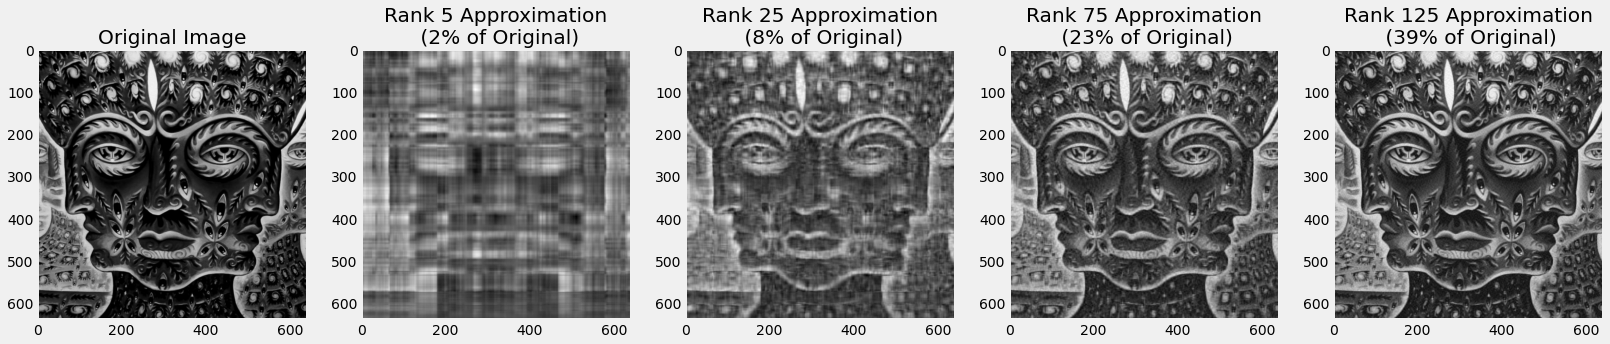

In [9]:
im_path = '/home/seb/Pictures/10000Days.jpg'
tk_days = mpimg.imread(im_path)

fig, axs = plt.subplots(1, 5, figsize=(25, 8))
m, n = tk_days.shape[0], tk_days.shape[1]

def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

tk_days_g = rgb2gray(tk_days)  # convert to gray scale

# SVD
U, s, VT = LA.svd(tk_days_g) 
S = np.diag(s)

# truncated matrix approximation
rs=[5, 25, 75, 125]
ax = 1
for r in rs:
    approx_im = U[:, :r] @ S[:r, :r] @ VT[:r, :]
    compress_rate = r*(m+n+1)/(m*n)
    axs[ax].imshow(approx_im, cmap='gray')
    axs[ax].set_title('Rank {} Approximation\n ({:.0%} of Original)'.format(r, compress_rate))
    axs[ax].grid(False)
    ax += 1

axs[0].imshow(tk_days_g, cmap='gray')
axs[0].set_title('Original Image')
axs[0].grid(False)
plt.savefig('image_approx.png')

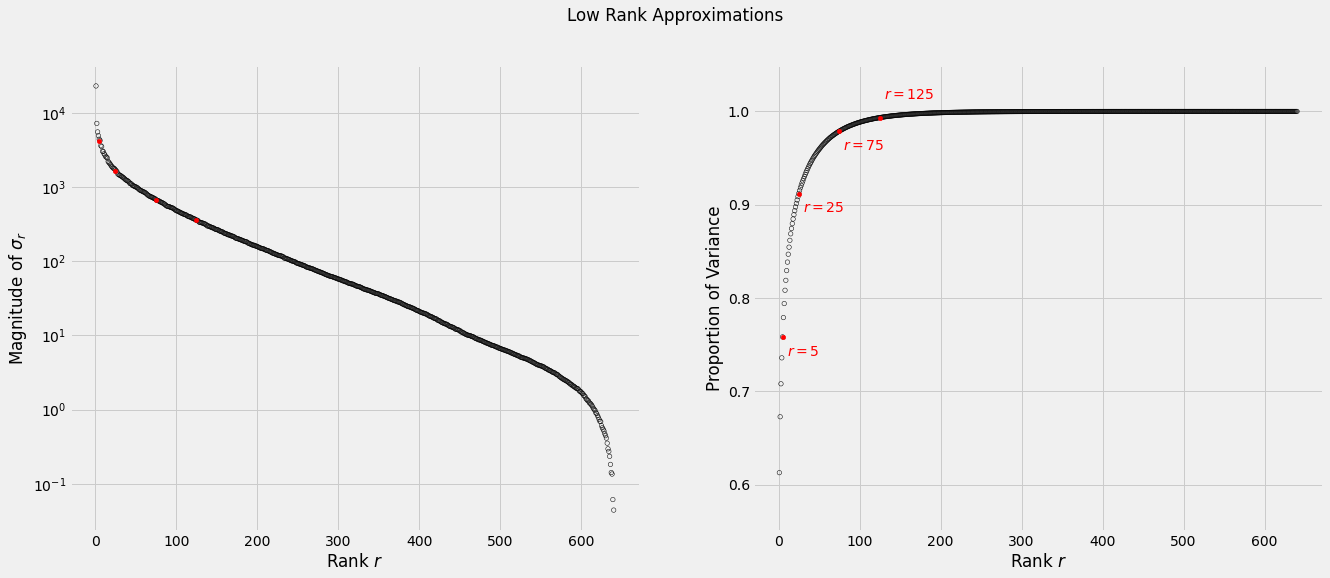

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# plot size of singular values.  Use log-scale
# to account for large differences  
axs[0].scatter(np.linspace(1, n, n), s, s=20, facecolors='none', edgecolors='black')
axs[0].scatter(rs, s[rs], s=20, c='red')
axs[0].set_yscale('log')
axs[0].set_xlabel('Rank $r$')
axs[0].set_ylabel('Magnitude of $\sigma_r$')

# plot cumulative variance
axs[1].scatter(np.linspace(1, n, n), np.cumsum(s**2)/np.sum(s**2), s=20, facecolors='none', edgecolors='black')
for r in rs:
    cumulative_var = np.sum(s[:r]**2)/np.sum(s**2)
    axs[1].scatter(r, cumulative_var, s=20, c='red')
    if r in rs[:3]:
        axs[1].text(r+5, cumulative_var-0.02, '$r={}$'.format(r), c='red')
    else:
        axs[1].text(r+5, cumulative_var+0.02, '$r={}$'.format(r), c='red')
axs[1].set_ylim(0.55, 1.05)
axs[1].set_xlabel('Rank $r$')
axs[1].set_ylabel('Proportion of Variance')
fig.suptitle('Low Rank Approximations');

# 2. Principal Component Analysis
In this section we apply the SVD to the Canadian fixed income market, in particular 1-5 year Treasury rates.  Treasury rates are intrinsically linked to so many aspects of financial markets that understanding how their fluctuations affect the value of a portfolio is a key part of risk management.  We can use PCA to uncover the variance structure between 1-5 year treasury rates and gain insight into how much exposure a portfolio may have to fluctuations.  Below we import a csv containing 39 days worth of Treasury rates ranging from April 26, 2021 and June 18, 2021.  Specifically, these are $x$-year zero rates calculated using the bootstrap procedure for Government of Canada issued on-the-run bonds (more details on bootstrapping can be found in my analysis <a href='https://nbviewer.jupyter.org/github/SebastianLech/treasury_analysis/blob/main/treasury_analysis_nb.ipynb'>here</a>).

Recall from above that we can always decompose a matrix 

$$A = U\Sigma V^T$$

Here $A$ is $m\times n$ with $n$ different Treasury notes and $m$ rates for each.  1-5 year Treasury rates gives us 10 bonds and, left as is, the ```rates``` matrix below exists in $\Bbb{R}^{10}$.  Data collected in a high dimensional space might contain redundancies and addressing this problem visually is beyond interpretation; this is our motivation for PCA.  Recall that $V$ in the SVD is the matrix whose columns are the eigenvectors of the covariance matrix $A^TA$.  These eigenvectors provide the directions that capture the most variation within the dataset and are called principal axis.  We will see that the first three principal axes account for roughly $98\%$ of all variation in the dataset.  This is favorable because it significantly reduces the dimension of our dataset, which is also now visually accessible.  

In [5]:
rates = pd.read_csv('~/server/projects/finance/data/spot_data.csv', index_col='Date')
rates.head()

,0.5 year spot rate,1.0 year spot rate,1.5 year spot rate,2.0 year spot rate,2.5 year spot rate,3.0 year spot rate,3.5 year spot rate,4.0 year spot rate,4.5 year spot rate,5.0 year spot rate
Date,,,,,,,,,,
2021-06-18,0.002278,0.002848,0.003624,0.004426,0.005457,0.006284,0.007047,0.008059,0.009141,0.010075
2021-06-17,0.002057,0.002489,0.003101,0.003883,0.004913,0.005922,0.006737,0.007672,0.008762,0.009742
2021-06-16,0.001642,0.002188,0.002798,0.003534,0.004483,0.005372,0.006069,0.006961,0.007997,0.008991
2021-06-15,0.001681,0.002129,0.002794,0.003533,0.004502,0.005403,0.006101,0.006981,0.008012,0.008993
2021-06-14,0.001748,0.002139,0.002722,0.003475,0.004454,0.005276,0.005994,0.006965,0.008005,0.008987


Below we use the SVD to compute the principal axis.  We see that the first 3 principal axes capture almost all the variation in the dataset.  If we wanted to model the behavior of the spot curve, we could narrow our focus to these three directions.  According to the analysis of section 21.9 in [5] the principal axis have a direct relationship with the zero curve.  Notice that the first principal axis is responsible for an almost uniform shift in one direction of the spot curve.  Likewise, the second principal axis is responsible for a steepening of the spot curve, since the sign between 0.5-3.5 year rates and 4-5 year rates are opposite.  We will see one end of the zero curve increase and the other decrease along this axis, resulting in a steeper curve.  Lastly, the third principal axis will "bow" or "twist" the zero curve, since rates at either end of the term period (0.5-2y and 4.5-5y) will move in one direction and the rates for middle term periods (2.5-4y) will move in the opposite direction.  These behaviors are plotted below.   

In [6]:
rates -= rates.mean(axis=0) # mean center the data
m2, n2 = rates.shape
U2, s2, VT2 = LA.svd(rates)
S2 = np.zeros((39, 39))
S2[:10, :10] = np.diag(s2)
pc_df = pd.DataFrame(VT2.T, columns = ['PA{}'.format(i) for i in range(1, n2+1)])
pc_df['Maturity'] = rates.columns.str[:9]
display(pc_df.set_index('Maturity'))

,PA1,PA2,PA3,PA4,PA5,PA6,PA7,PA8,PA9,PA10
Maturity,,,,,,,,,,
0.5 year,-0.185007,0.106044,0.595218,-0.441378,-0.545078,-0.004977,0.323239,0.039955,-0.036243,0.029997
1.0 year,-0.194778,0.153716,0.526506,-0.124241,0.330439,0.008127,-0.725234,-0.088829,0.038078,-0.035025
1.5 year,-0.248563,0.339611,0.201635,0.297687,0.374404,-0.199796,0.455534,-0.506245,0.032448,0.220594
2.0 year,-0.275657,0.427065,0.025758,0.351568,-0.005603,-0.157746,0.052427,0.545478,-0.360359,-0.402860
2.5 year,-0.300443,0.333442,-0.140558,0.095710,-0.092043,0.487731,0.002515,0.203122,0.686222,0.105422
3.0 year,-0.308892,0.248320,-0.375460,-0.381188,0.038831,0.451564,-0.048348,-0.255651,-0.528943,0.061275
3.5 year,-0.334299,0.024347,-0.331582,-0.538042,0.208041,-0.594506,0.030430,0.153605,0.257609,-0.024780
4.0 year,-0.410386,-0.113358,-0.191886,0.325364,-0.579409,-0.266907,-0.321894,-0.399820,0.032613,-0.067545
4.5 year,-0.406552,-0.414238,0.075887,0.166348,0.080827,0.026664,-0.003364,0.372478,-0.204829,0.664636


Text(0.5, 1.0, 'Explained Variation among Principal Axes')

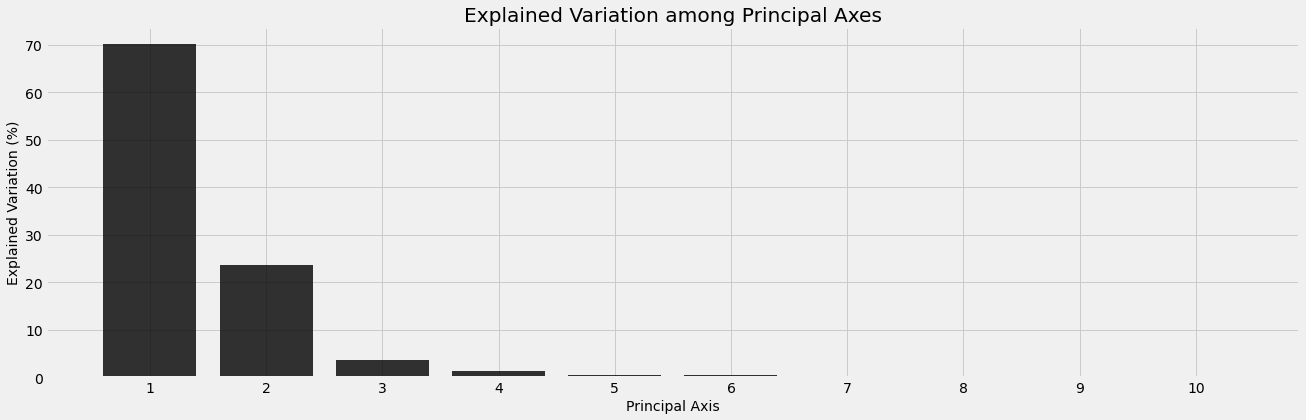

In [7]:
fig, ax = plt.subplots(1, figsize=(20, 6))
explained_var2 = (s2**2 / np.sum(s2**2))*100
ax.bar(np.arange(n2)+1, explained_var2, color='black', alpha=0.8)
ax.set_xticks(np.arange(n2)+1);
ax.set_xlabel('Principal Axis', fontsize='medium')
ax.set_ylabel('Explained Variation (%)', fontsize='medium')
ax.set_title('Explained Variation among Principal Axes')

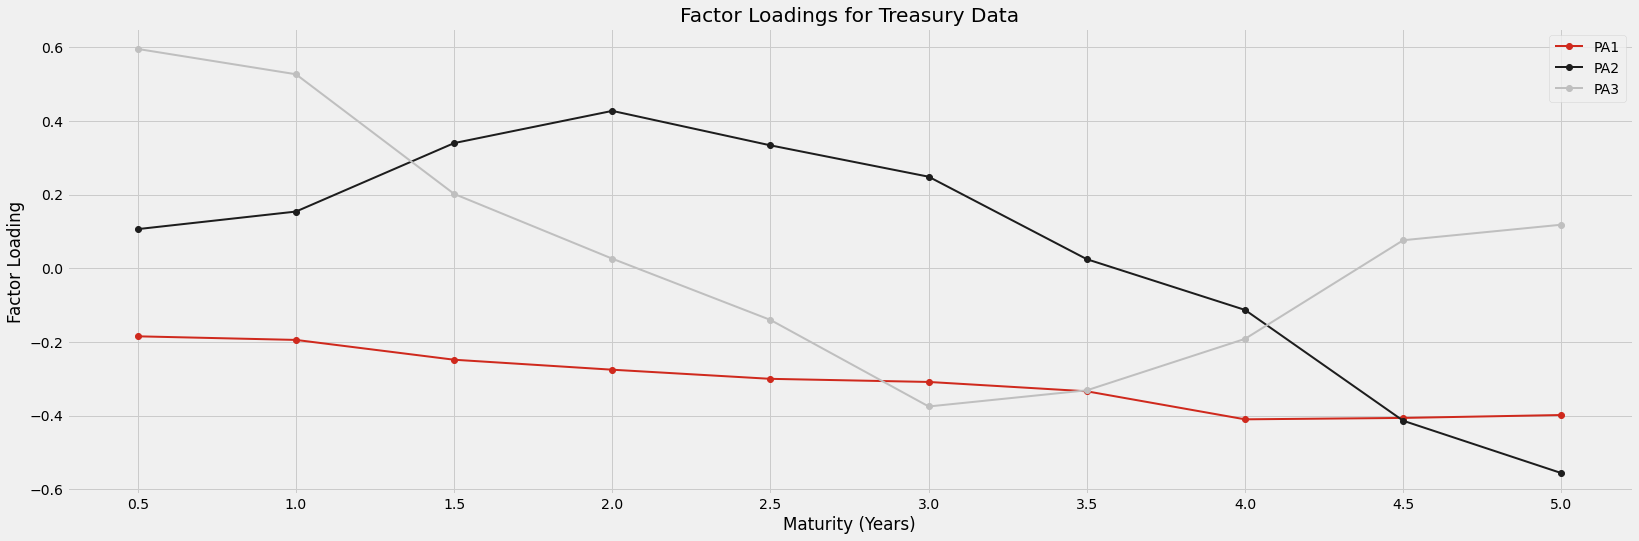

In [8]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(25, 8))
i=1
colors=['#CF291D', '#1D1D1D', '#BFBFBF']
for component in VT2[:3]:
    ax.plot(rates.columns.str[:3], 
            component, marker='o', 
            linestyle='solid', linewidth=2, 
            label='PA{}'.format(i), c=colors[i-1])
    i+=1
plt.legend(loc='upper right')
ax.set_xlabel('Maturity (Years)')
ax.set_ylabel('Factor Loading')
ax.set_title('Factor Loadings for Treasury Data');

Below is a visual interpretation of the Treasury data after transforming it using PCA.  The plot represents each of the 39 samples projected into $\Bbb{R}^3$ along the 3 most important principal axes.  For highly correlated variables this could be a very useful technique for classification.  In our case each sample exists in the same class (CAD Treasury Note) but in other contexts samples may be organized using a distinguishing factor, like sector or exchange, and visually represented similar to what is shown below.  One could then look for clusters among the securities to see if the principal components reveal any underlying correlated structure behind the variables.  

Moreover, section 21.9 in [5] extends the PCA to model the risk profile of a potential portfolio.  In particular, PCA can be used to calculate the VaR (Value at Risk) of a portfolio, a risk metric used to understand worst-case scenarios.  Developing a model using VaR is beyond the scope of this report but it essentially amounts to interpreting the value of a portfolio as a function of the principal components, then determining the statistical properties of this function to understand worst-case outcomes.   

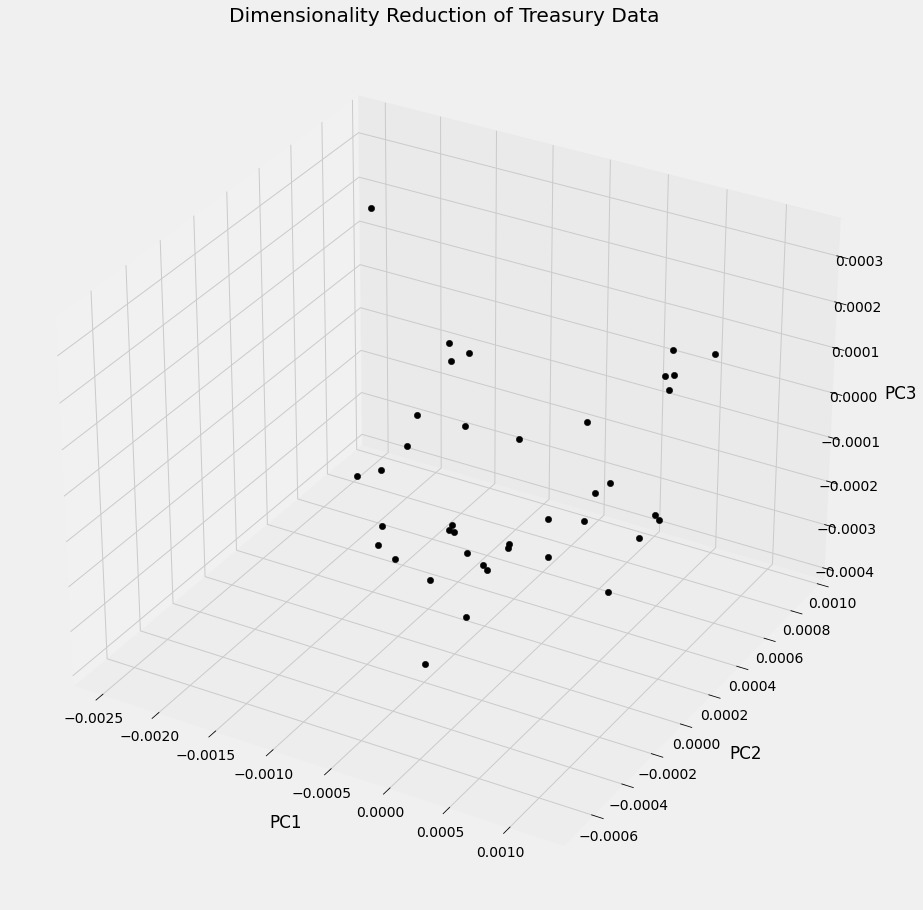

In [10]:
fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection='3d')


for i in range(m2):
    x = VT2[0, :]@rates.values[i, :].T
    y = VT2[1, :]@rates.values[i, :].T
    z = VT2[2, :]@rates.values[i, :].T
    ax.scatter(x, y, z, color='black', s=40)
    
ax.set_xlabel('PC1', labelpad=20)
ax.set_ylabel('PC2', labelpad=20)
ax.set_zlabel('PC3', labelpad=20)
ax.set_title('Dimensionality Reduction of Treasury Data');
plt.savefig('PCA_treasury.png')

# 4. Conclusion
In this notebook we have seen two applications of the Singular Value Decomposition.  The SVD is a fundamental result in linear algebra and has applications that extend far beyond what is presented here.  In data science, the SVD can be used to exploit correlated structure within a dataset to reduce its complexity or approximate it using less space.  Theoretically, it corresponds to a decomposition of linear transformations into general rotations and scaling.  Since this is possible for any matrix, it allows us to get a fundamental understanding of even some of the most complex ideas.    

# 5. Appendix (sklearn PCA)
Its worth noting that the analysis above could have been performed using sklearn's PCA class.  Although there are sign differences between the principal axis computed above, the result is the same.  The only thing that has changed is the relative orientation of the space defined by PA1-PA10, the behavior dictated by these axis remains identical (just oriented in a different manner).  

In [968]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(rates)
display(pd.DataFrame(pca.components_.T, columns= ['PA{}'.format(i) for i in range(1, n2+1)], index=rates.columns))
display(pd.DataFrame(np.vstack([pca.singular_values_, np.cumsum(pca.explained_variance_ratio_)*100]).T,
                     index=['Singular Value {}'.format(i) for i in range(1, n2+1)], 
                     columns=['Size', 'Cumulative Explained Variance']).T)

,PA1,PA2,PA3,PA4,PA5,PA6,PA7,PA8,PA9,PA10
0.5 year spot rate,0.185007,0.106044,-0.595218,0.441378,0.545078,-0.004977,-0.323239,-0.039955,-0.036243,-0.029997
1.0 year spot rate,0.194778,0.153716,-0.526506,0.124241,-0.330439,0.008127,0.725234,0.088829,0.038078,0.035025
1.5 year spot rate,0.248563,0.339611,-0.201635,-0.297687,-0.374404,-0.199796,-0.455534,0.506245,0.032448,-0.220594
2.0 year spot rate,0.275657,0.427065,-0.025758,-0.351568,0.005603,-0.157746,-0.052427,-0.545478,-0.360359,0.402860
2.5 year spot rate,0.300443,0.333442,0.140558,-0.095710,0.092043,0.487731,-0.002515,-0.203122,0.686222,-0.105422
3.0 year spot rate,0.308892,0.248320,0.375460,0.381188,-0.038831,0.451564,0.048348,0.255651,-0.528943,-0.061275
3.5 year spot rate,0.334299,0.024347,0.331582,0.538042,-0.208041,-0.594506,-0.030430,-0.153605,0.257609,0.024780
4.0 year spot rate,0.410386,-0.113358,0.191886,-0.325364,0.579409,-0.266907,0.321894,0.399820,0.032613,0.067545
4.5 year spot rate,0.406552,-0.414238,-0.075887,-0.166348,-0.080827,0.026664,0.003364,-0.372478,-0.204829,-0.664636
5.0 year spot rate,0.398656,-0.556348,-0.118041,-0.006657,-0.240795,0.260628,-0.228900,0.088750,0.079130,0.570202


,Singular Value 1,Singular Value 2,Singular Value 3,Singular Value 4,Singular Value 5,Singular Value 6,Singular Value 7,Singular Value 8,Singular Value 9,Singular Value 10
Size,0.004364,0.002539,0.001001,0.000588,0.000393,0.000324,0.000168,0.000115,0.000076,0.00004
Cumulative Explained Variance,70.156038,93.898814,97.592046,98.864911,99.433126,99.819449,99.923886,99.972930,99.994200,100.00000
